In [7]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv('../Challenge_Data/performance_data.csv')

In [11]:
df.shape

(905, 4)

In [12]:
df.head()

,game_id,preview_link,ER,CTR
0,bfbf7a2b7ac635e67877b1ab87fd6629,https://s3.us-east-1.amazonaws.com/a.futureadl...,0.209269,0.058438
1,945010afbf9a55bbdffcb0895f946155,https://s3.us-east-1.amazonaws.com/a.futureadl...,0.274552,0.074731
2,e68e20f592457b875ce29757ab855dfe,https://s3.us-east-1.amazonaws.com/a.futureadl...,0.103688,0.042228
3,adunit-nestle-purina-friskies-mob,https://s3.ap-southeast-1.amazonaws.com/a.futu...,0.136963,0.005393
4,adunit-lionsgate-uwomt-user-slider-sensory-vid...,https://s3.us-west-1.amazonaws.com/a.futureadl...,0.114208,0.016443


In [16]:
df['game_id'].nunique()

905

In [21]:
df['preview_link'].nunique()

905

In [17]:
df.describe()

,ER,CTR
count,905.000000,905.000000
mean,0.136318,0.034466
std,0.091524,0.036967
min,0.000000,0.000000
25%,0.070338,0.007926
50%,0.118624,0.024537
75%,0.190722,0.047796
max,0.524498,0.297410


In [19]:
import seaborn as sns

### Click Through Rate(CTR)
CTR is a metric that holds significant importance in the world of online advertising, email marketing, and search engine marketing. It measures the percentage of users who click on a specific link or advertisement relative to the total number of users who view it.

It's calculated by dividing the number of clicks a link receives by the number of impressions or views it accumulates.

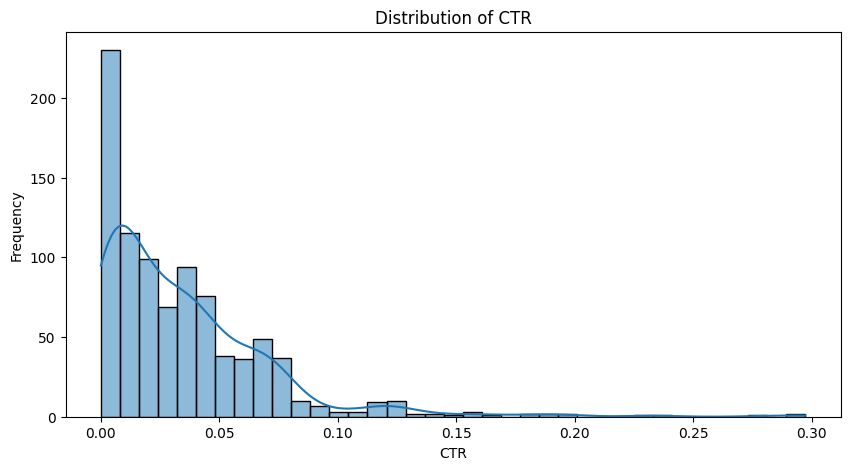

In [20]:
plt.figure(figsize=(10, 5))
sns.histplot(df['CTR'], kde=True)
plt.title('Distribution of CTR')
plt.xlabel('CTR')
plt.ylabel('Frequency')
plt.show()

### Engagement Rate(ER)
ER evaluates the level of interaction and involvement of users with a particular piece of content. It measures the percentage of users who actively engage with the content by taking actions such as liking, commenting, sharing, or spending a significant amount of time consuming the content.

It's computed by dividing the number of engagement actions (likes, comments, shares, etc.) by the reach or total number of people exposed to the content

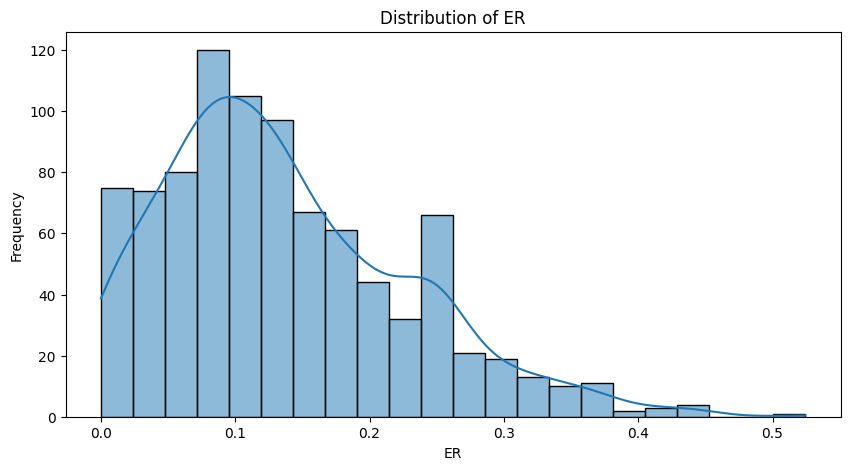

In [22]:
# Distribution of ER
plt.figure(figsize=(10, 5))
sns.histplot(df['ER'], kde=True)
plt.title('Distribution of ER')
plt.xlabel('ER')
plt.ylabel('Frequency')
plt.show()

In [32]:
from urllib.parse import urlparse

In [33]:
# Function to extract domain from URL
def extract_domain(url):
    parsed_url = urlparse(url)
    return parsed_url.netloc

# Apply the function to the preview_link column
df['domain'] = df['preview_link'].apply(extract_domain)

In [36]:
df['domain'].unique()

array(['s3.us-east-1.amazonaws.com', 's3.ap-southeast-1.amazonaws.com',
       's3.us-west-1.amazonaws.com', 's3.eu-west-1.amazonaws.com',
       's3.ap-east-1.amazonaws.com'], dtype=object)

In [43]:
df.groupby('domain').agg({'ER': ['mean'],'CTR': ['mean', 'count']}).reset_index()

domain        ER       CTR      
                                        mean      mean count
0       s3.ap-east-1.amazonaws.com  0.159124  0.051722    31
1  s3.ap-southeast-1.amazonaws.com  0.166350  0.021569   175
2       s3.eu-west-1.amazonaws.com  0.176750  0.036779    98
3       s3.us-east-1.amazonaws.com  0.143496  0.041359   324
4       s3.us-west-1.amazonaws.com  0.092093  0.031801   277

In [46]:
domain_counts = df['domain'].value_counts()

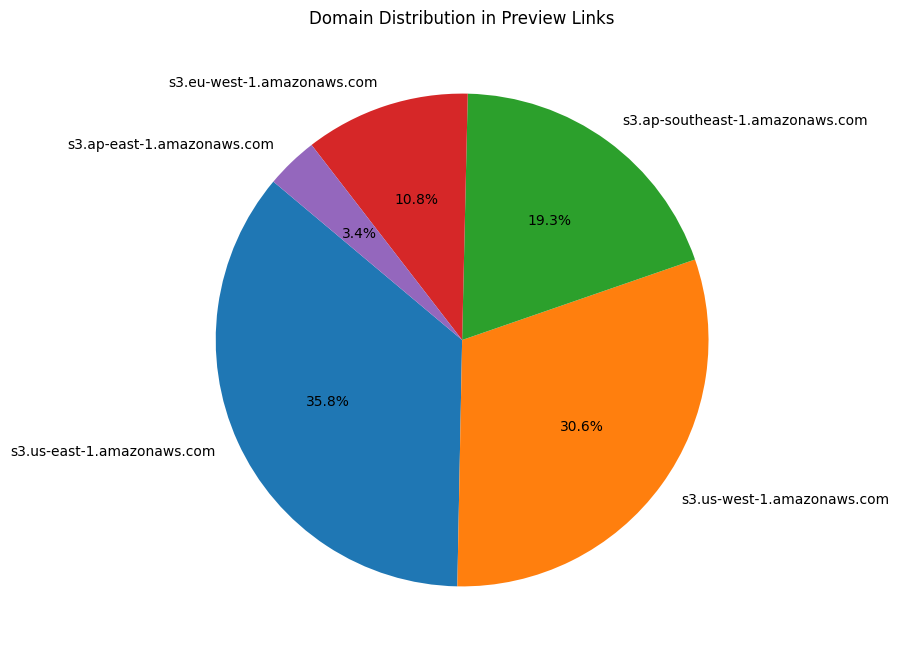

In [47]:
# Pie chart of domain distribution
plt.figure(figsize=(8, 8))
plt.pie(domain_counts, labels=domain_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Domain Distribution in Preview Links')
plt.show()